In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tools

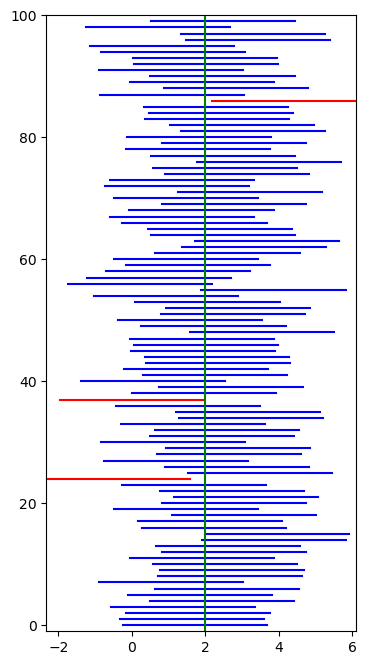

In [2]:
## Problem 1: Simulering av konfidensintervall
# Parametrar
# Antal mätningar
n = 1
# Väntevärdet
mu = 2
# Standardavvikelsen
sigma = 1
# Ett minus konfidensgraden
alpha = 0.05
# Antal intervall
m = 100
# Simulera n observationer för varje intervall.
x = stats.norm.rvs(loc=mu, scale=sigma, size=(m, n))
# Skatta mu med medelvärdet.
xbar = np.mean(x, axis=-1)
# Beräkna kvantilerna och standardavvikelsen för
# medelvärdet.
lambda_alpha_2 = stats.norm.ppf(1 - alpha / 2)
D = sigma / np.sqrt(n)
# Beräkna undre och övre gränserna.
undre = xbar - lambda_alpha_2 * D
övre = xbar + lambda_alpha_2 * D
# Skapa en figur med storlek 4 × 8 tum.
plt.figure(figsize=(4, 8))
# Rita upp alla intervall
for k in range(m):
    # Rödmarkera alla intervall som missar mu.
    if övre[k] < mu or undre[k] > mu:
        color = 'r'
    else:
        color = 'b'
    plt.plot([undre[k], övre[k]], [k, k], color)
# Fixa till gränserna så att figuren ser lite bättre ut.
b_min = np.min(undre)
b_max = np.max(övre)
plt.axis([b_min, b_max, -1, m])
# Rita ut det sanna värdet.
plt.plot([mu, mu], [-1, m], 'g')
# Visa plotten.
plt.show()

3.9925766621574277 3.9949442903094563


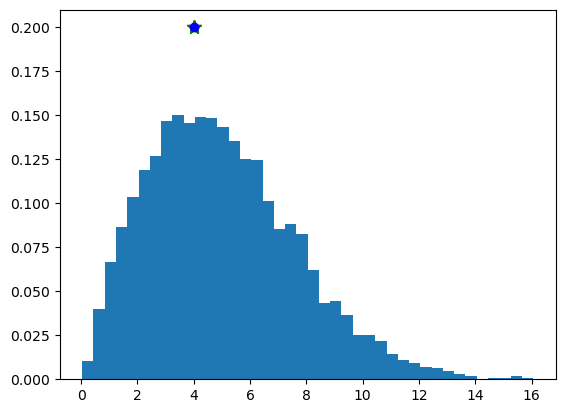

In [3]:
## Problem 2: Maximum likelihood, minsta kvadrat
M = 10000
b = 4
# Simulera M utfall med parameter b.
x = stats.rayleigh.rvs(scale=b, size=M)
# Skapa figur och plotta histogrammet.
plt.figure()
plt.hist(x, 40, density=True)
est_ml = np.sqrt(np.sum(x**2) / (2*M)) # Skriv din ML-skattning här
est_mk = np.mean(x) * np.sqrt(2/np.pi) # Skriv din MK-skattning här
print(est_ml, 
est_mk)
# Plotta de två skattningarna.
plt.plot(est_ml, 0.2, 'r*', markersize=10)
plt.plot(est_mk, 0.2, 'g*', markersize=10)
plt.plot(b, 0.2, 'bo')
plt.show()

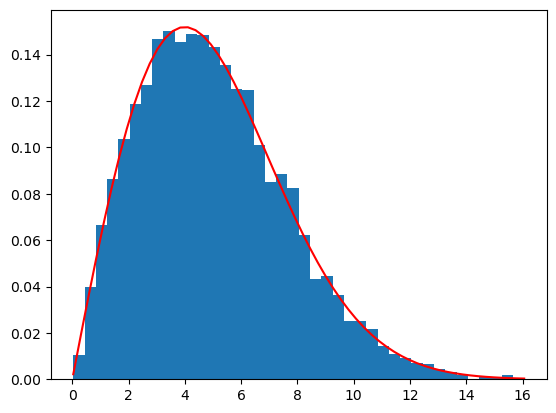

In [4]:
## Problem 2: Maximum likelihood, minsta kvadrat (forts.)
# Skapa figur.
plt.figure()
# Visa histogrammet.
plt.hist(x, 40, density=True)
# Plotta täthetsfunktionen för den skattade parametern.
x_grid = np.linspace(np.min(x), np.max(x), 60)
pdf = stats.rayleigh.pdf(x_grid, scale=est_ml)
plt.plot(x_grid, pdf, 'r')
plt.show()

10000
1.959963984540054
1.0141417528872556
1.0037516815158023 1.0141417528872556 1.024531824258709


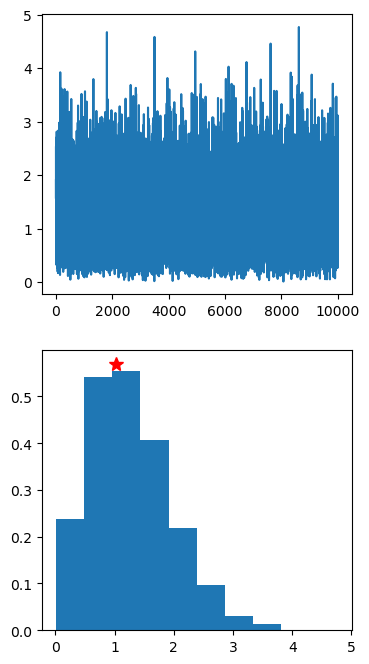

In [12]:
## Problem 3: Konfidensintervall for Rayleighfordelning
# Ladda data.
y = np.loadtxt('wave_data.txt')
# Plotta en bit av signalen samt histogrammet.
print(len(y))
est1 = np.sqrt(np.sum(y**2) / (2*len(y))) # Skriv din ML-skattning här
est = np.mean(y) * np.sqrt(2/np.pi)# Skriv din MK-skattning här
alpha2 = 0.05
critvalue = stats.norm.ppf(1 - alpha / 2)
print(critvalue)
print(est)
#1.96 för α = 0.025, 95% (1-2*α) CI
lower_bound = est - critvalue*est*np.sqrt((4-np.pi)/(np.pi*len(y)))
upper_bound = est + critvalue*est*np.sqrt((4-np.pi)/(np.pi*len(y)))
print(lower_bound, est, upper_bound)

plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.plot(y)

plt.subplot(2, 1, 2)
plt.hist(y, density=True)
plt.plot(est1, 0.57, 'r*', markersize=10)
plt.show()

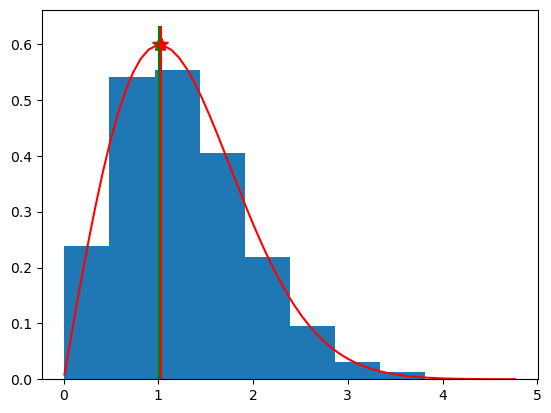

In [6]:
## Problem 3: Konfidensintervall (forts.)
# Plotta histogrammet och skattningen.
plt.figure()
plt.hist(y, density=True)
plt.plot(lower_bound, 0.6, 'g*', markersize=10)
plt.plot(upper_bound, 0.6, 'r*', markersize=10)
# Plotta täthetsfunktionen med den skattade parametern.
x_grid = np.linspace(np.min(y), np.max(y), 60)
pdf = stats.rayleigh.pdf(x_grid, scale=est)
plt.plot([lower_bound, lower_bound], [0, 0.63], 'g')
plt.plot([upper_bound, upper_bound], [0, 0.63], 'r')
plt.plot(x_grid, pdf, 'r')
plt.show()

In [7]:
## Problem 4: Fördelningar av givna data
# Ladda datafilen.
birth = np.loadtxt('birth.dat')
# Definiera filter beroende på om modern röker (kolonn 20
# är 3) eller inte (kolonn 20 är 1 eller 2). Notera att
# eftersom indexering i Python börjar med noll så betecknas
# kolonn 20 med indexet 19.
non_smokers = (birth[:, 19] < 3)
smokers = (birth[:, 19] == 3)
# Extrahera födelsevikten (kolonn 3) för de två kategorierna.
x = birth[non_smokers, 2]
y = birth[smokers, 2]

Non Smokers vs Smokers


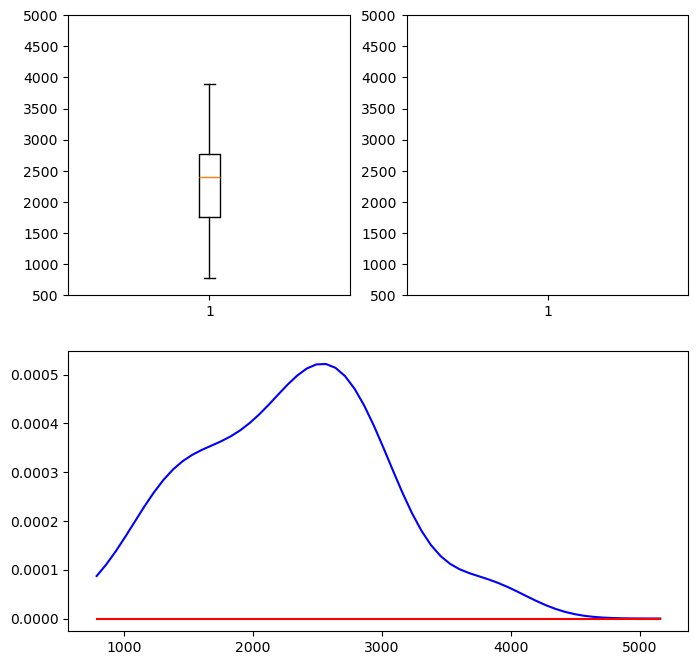

In [13]:
## Problem 4: Fördelningar av givna data (forts.)
# Skapa en stor figur.
plt.figure(figsize=(8, 8))
# Plotta ett låddiagram över x.
plt.subplot(2, 2, 1)
plt.boxplot(x)
plt.axis([0, 2, 500, 5000])# Plotta ett låddiagram över y.
plt.subplot(2, 2, 2)
plt.boxplot(y)
plt.axis([0, 2, 500, 5000])
#print(x)
# Beräkna kärnestimator för x och y. Funktionen
# gaussian_kde returnerar ett funktionsobjekt som sedan
# kan evalueras i godtyckliga punkter.
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)
# Skapa ett rutnät för vikterna som vi kan använda för att
# beräkna kärnestimatorernas värden.
min_val = np.min(birth[:, 2])
max_val = np.max(birth[:, 2])
grid = np.linspace(min_val, max_val, 60)
# Plotta kärnestimatorerna.
plt.subplot(2, 2, (3, 4))
print('Non Smokers vs Smokers')
plt.plot(grid, kde_x(grid), 'b')
plt.plot(grid, kde_y(grid), 'r')
plt.show()

Early Birth vs Not Early Birth


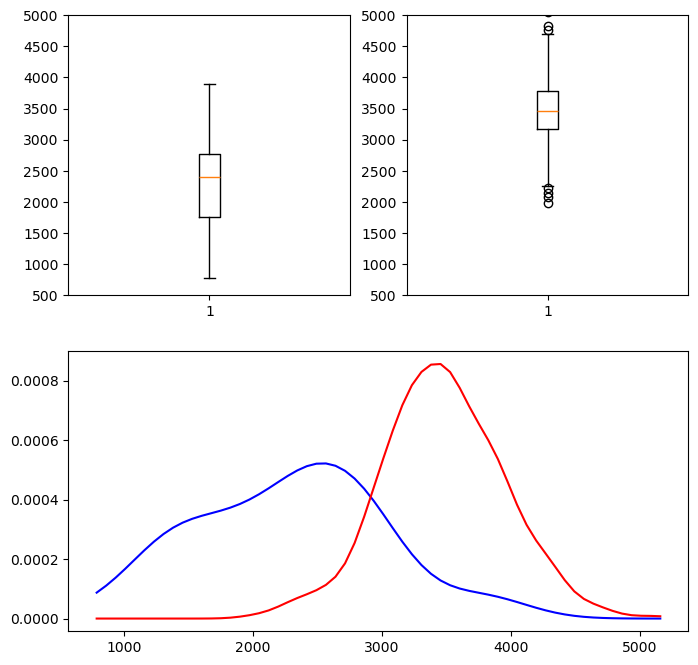

In [9]:
## Problem 4: Fördelningar av givna data Tidig födsel < Vecka 37 = Dag 259
# Ladda datafilen.
birth = np.loadtxt('birth.dat')
# Definiera filter beroende på om modern röker (kolonn 20
# är 3) eller inte (kolonn 20 är 1 eller 2). Notera att
# eftersom indexering i Python börjar med noll så betecknas
# kolonn 20 med indexet 19.
non_smokers = (birth[:, 0] < 259)
smokers = (birth[:, 0] >= 259)
# Extrahera födelsevikten (kolonn 3) för de två kategorierna.
x = birth[non_smokers, 2]
y = birth[smokers, 2]## Problem 4: Fördelningar av givna data (forts.)
# Skapa en stor figur.
plt.figure(figsize=(8, 8))
# Plotta ett låddiagram över x.
plt.subplot(2, 2, 1)
plt.boxplot(x)
plt.axis([0, 2, 500, 5000])# Plotta ett låddiagram över y.
plt.subplot(2, 2, 2)
plt.boxplot(y)
plt.axis([0, 2, 500, 5000])
#print(x)
# Beräkna kärnestimator för x och y. Funktionen
# gaussian_kde returnerar ett funktionsobjekt som sedan
# kan evalueras i godtyckliga punkter.
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)
# Skapa ett rutnät för vikterna som vi kan använda för att
# beräkna kärnestimatorernas värden.
min_val = np.min(birth[:, 2])
max_val = np.max(birth[:, 2])
grid = np.linspace(min_val, max_val, 60)
# Plotta kärnestimatorerna.
plt.subplot(2, 2, (3, 4))
print('Early Birth vs Not Early Birth')
plt.plot(grid, kde_x(grid), 'b')
plt.plot(grid, kde_y(grid), 'r')
plt.show()

[-6.78027783e+02  3.44076963e-01]


<Figure size 400x800 with 0 Axes>

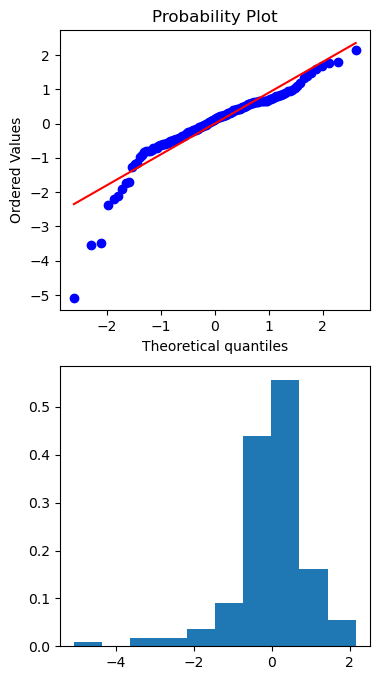

In [59]:
moore = np.loadtxt('moore.dat')
plt.figure(figsize=(4, 8))
# plt.plot(moore)
ones = np.ones(len(moore))
X = np.column_stack((ones, moore[:, 0]))
w = np.log(moore[:, 1])
beta_hat, beta_int = tools.regress(X, w)
print(beta_hat)
## Problem 6: Regression
# Bilda residualerna.
res = w - X @ beta_hat

# Skapa figur.
plt.figure(figsize=(4, 8))

# Plotta kvantil–kvantil-plot för residualerna.
plt.subplot(2, 1, 1)
_ = stats.probplot(res, plot=plt)

# Plotta histogram för residualerna.
plt.subplot(2, 1, 2)
plt.hist(res, density=True)
plt.show()

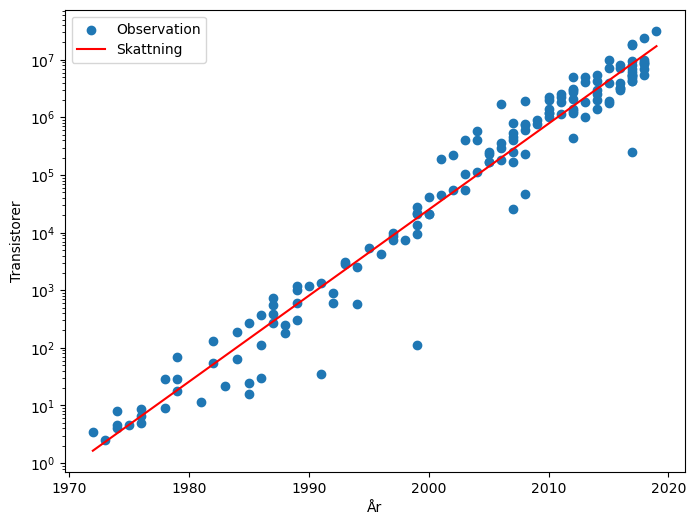

In [65]:
w_hat = X @ beta_hat
y_hat = np.exp(w_hat)
plt.figure(figsize=(8,6))

plt.scatter(moore[:,0], moore[:,1], label="Observation")

plt.plot(moore[:,0], y_hat, 'r', label="Skattning")

plt.yscale("log")
plt.xlabel("År")
plt.ylabel("Transistorer")
plt.legend()
plt.show()

Hur många transistorer har vi år 2025?: 136.0 miljoner / ytenhet


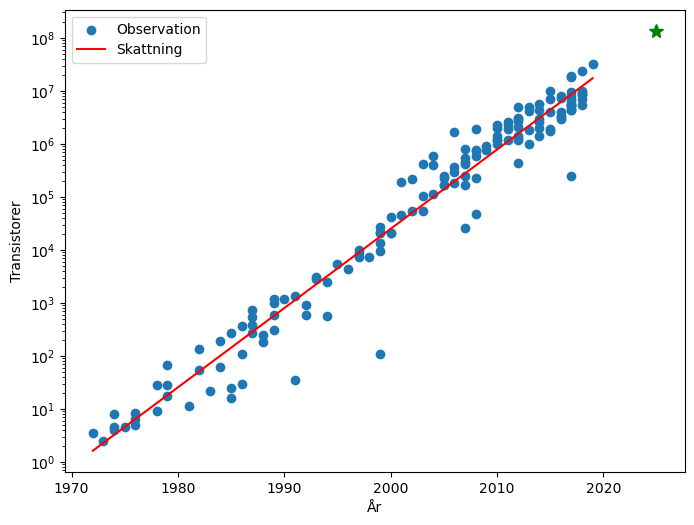

In [71]:
X_new = np.array([1, 2025])
w_pred = X_new @ beta_hat
y_pred = np.exp(w_pred)

print("Hur många transistorer har vi år 2025?:", np.round(y_pred / 1000000), "miljoner / ytenhet")
plt.figure(figsize=(8,6))

plt.scatter(moore[:,0], moore[:,1], label="Observation")

plt.plot(moore[:,0], y_hat, 'r', label="Skattning")
plt.plot(2025, y_pred, 'g*', markersize=10)

plt.yscale("log")
plt.xlabel("År")
plt.ylabel("Transistorer")
plt.legend()
plt.show()